# Part 1 - Exploratory Data Analysis

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

plt.style.use('seaborn')

In [2]:
import os
os.getcwd()

'/home/kc3pve/Desktop/Spring-Git/Springboard/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge'

In [3]:
login_times = pd.read_json('logins.json')

In [4]:
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
login_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


So, we have one column of type "datetime64".


In [6]:
# Aggregate these login counts based on 15 minute time interval

login_times.set_index('login_time', inplace=True)
login_times['count'] = 1
login_times.sort_index(inplace=True)
login_times_agg = login_times.resample("15min").sum()

In [7]:
login_times_agg['count'].sum()

93142

In [8]:
login_times_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


The data goes from January 1 to April 13 in 1970.

In [9]:
login_times_agg.head()


,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
today = datetime.datetime(2023, 9, 6)
today.weekday()  

2

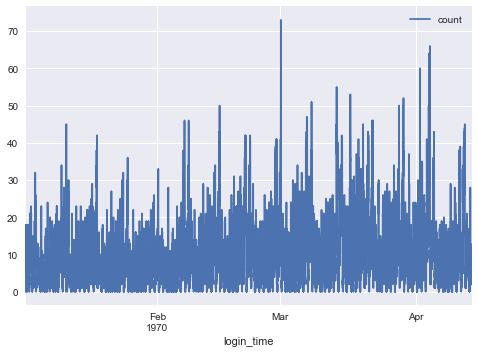

In [11]:
login_times_agg.plot()
plt.show()

The plot is messy but we observe there is periodic variation. We can smooth
the data to see it with more clarity.


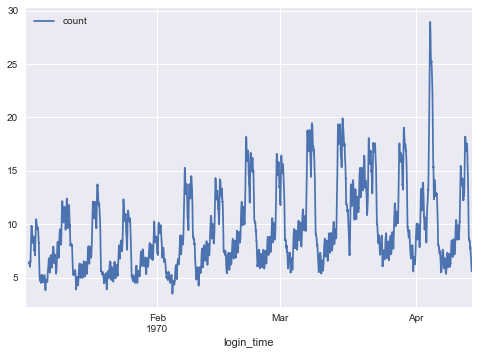

In [12]:
login_times_agg.rolling(window=84).mean().plot()
plt.show()

The demand is rising and falling in a weekly basis as there are four to five peaks every week. Let's look for a single month.

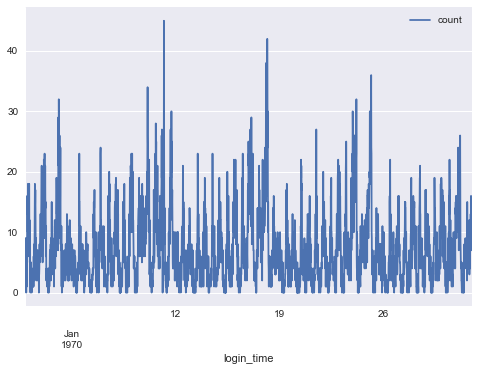

In [13]:
login_times_agg.loc['1970-01'].plot()
plt.show()

It needs more granulity although the periodicity is still observed.

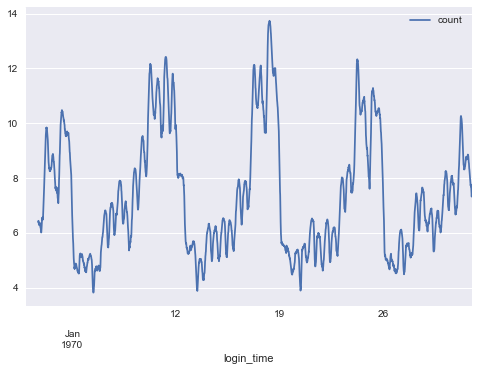

In [14]:
login_times_agg.loc['1970-01'].rolling(window=84).mean().plot()
plt.show()

So, the demand is seen rising in all the weekends. We can get further granular.

In [15]:
datetime.datetime(1970, 1, 11).weekday() # weekends - Saturday and  Sunday - 5 and 6. 


6

So, the first day of January in 1970 was Thursday.

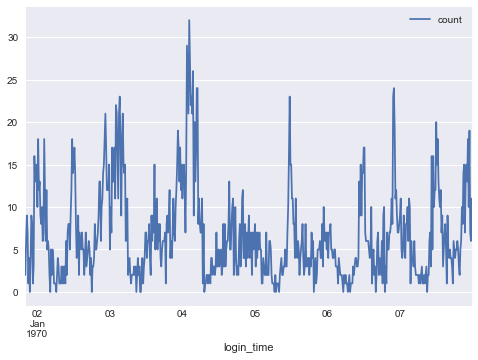

In [16]:
login_times_agg.loc['1970-01-01':'1970-01-07'].plot()
plt.show()

The use definitely increases at the end of the week (4th of January - Sunday). 
Let's look at smoothed version.

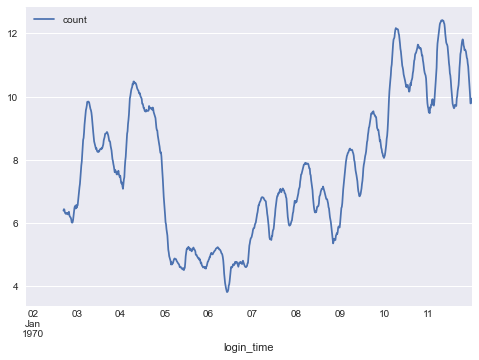

In [17]:
login_times_agg.loc['1970-01-01':'1970-01-11'].rolling(window=84).mean().plot()
plt.show()

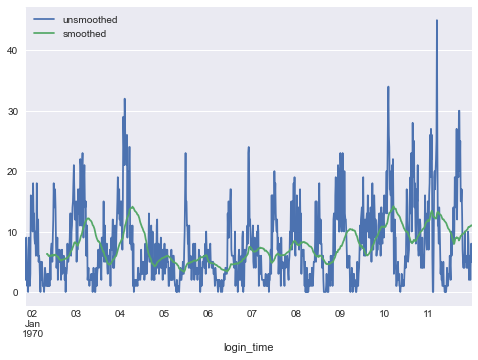

In [18]:
unsmoothed = login_times_agg['count']['1970-01-01':'1970-01-11']
smoothed = unsmoothed.rolling(window=48).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()

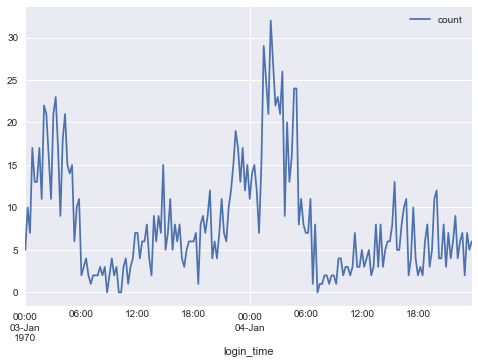

In [19]:
# Check for weekend
login_times_agg.loc['1970-01-03':'1970-01-04'].plot()
plt.show()

The curve peaks around midnight in the weekend. But, also has high value in the noon.

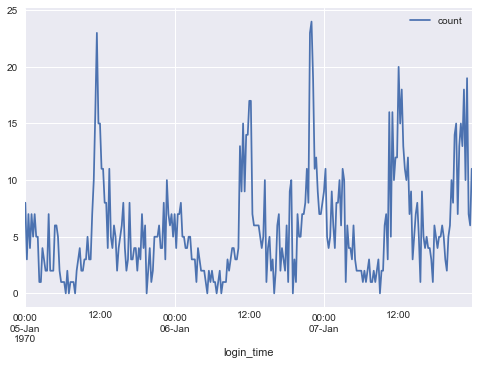

In [20]:
# Check for weekdays
login_times_agg.loc['1970-01-05':'1970-01-07'].plot()
plt.show()

The curve peaks around midnight and noon during weekdays.

So, we can surmise the analysis so far: 

    (i) The demand is higher in the weekends than in the weekdays.
    (ii) The demand is higher around midnight and noon for both weekdays and weekends.

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?



# Solution

1.)  I would assume the goal of the Ultimate is to maximize revenue. So, an increase in revenue after the implementation of the toll reimbursement policy could be a key measure of success of this experiment in encouraging driver partners to serve both cities. The increase in revenue can be ascertained if a price 
equilibrium is attained in both the cities. This is simple demand and supply situation. If the supply 
of a drivers in a certain city is high, the price is expected to be lower than another city where the supply of drivers is low (or, higher price). In this case, the drivers (from the city with lower price) would be motivated to cross the bridge to go to another city with less number of drivers (or, higher price).

The metric we could use for this is the percentage of drivers who cross the bridge from a city with less demand to the city with higher demand when there is imbalance in demand. We would want to learn how this percentage increases after the implementation of the toll reimbursement policy. The larger the increase, the greater the success of the policy.

We would also want to track the time when this 'bridge-crossing' of the drivers occurs as it is desirable it happens in less time when the tolls are reimbursed than when they aren't.


2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on : 

                  a) how you will implement the experiment?
                  b) what statistical test(s) you will conduct to verify the significance of the observation?
                  c) how you would interpret the results and provide recommendations to the city operations 
                  team along with any caveats?
                  

# Solution


a) If Ultime has an app to track the drivers' locations, then it will allow them to 'record' the bridge-crossing.    The company should also have access to data of 'bridge-crossing' without the toll-reimbursement policy. This will allow to compare the results with and without the reimbursement incentive. 

b)  We can use Hypothesis testing in this case to determine if the reimbursement incentive indeed increases the percentage of the bridge-crossing drivers. The null Hypothesis will be the percentage of bridge-crossing drivers would remain the same irrespective of the reimbursement policy.

c) If the proportions' of the bridge-crossing drivers increase after the implementation of the reimbursement incentive, then I would interpret the policy as success. But, if the increase is marginal as compared with other costs, then the policy might not be effective in terms of revenue. 

But, it could be still helpful for the company to continue to offer the incentive, despite possible loss,  to build its' brand and competitiveness as sometimes the short term loss could help in making long term gain.

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we 
have provided a sample dataset of a cohort of users who signed up for an Ultimate account 
in January 2014. The data was pulled several months later; we consider a user retained 
if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best 
predictors for retention, and offer suggestions to operationalize those insights to 
help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below 
for a detailed description of the dataset. Please include any code you wrote for 
the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import sklearn
import seaborn as sns

In [24]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)


# Put data in Dataframe
user_df = pd.DataFrame(data)

In [25]:
user_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [27]:
user_df['signup_date']

0        2014-01-25
1        2014-01-29
2        2014-01-06
3        2014-01-10
4        2014-01-27
            ...    
49995    2014-01-25
49996    2014-01-24
49997    2014-01-31
49998    2014-01-14
49999    2014-01-18
Name: signup_date, Length: 50000, dtype: object

In [35]:
len(user_df[user_df['trips_in_first_30_days' ]>0])

34610

In [37]:
(34610/50000)*100

69.22

In [45]:
user_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [67]:
user_df.last_trip_date = pd.to_datetime(user_df.last_trip_date)
#user_df['last_trip_date'].describe(datetime_is_numeric=True)
user_df['last_trip_date'].describe()

<ipython-input-67-9e0f661be83a>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  user_df['last_trip_date'].describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

The last trip was taken on July 1st. So, a user will be considered retained if they were “active” (i.e. took a trip) in the preceding 30 days which is the month of June in this case ! 

In [74]:
Percent_retained = 100*(user_df.last_trip_date >= '2014-06-01').sum() / (user_df.last_trip_date >= '2014-06-01').count()
Percent_retained

37.608